In [1]:
import pandas as pd
import numpy as np
#from sqlalchemy import create_engine
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
#import datetime
#datetime.datetime.strptime

In [2]:
#read in tweets as DataFrame

tweets_df = pd.read_csv('data/new_df2drop.csv')
tweets_df.head()


,Unnamed: 0,handle,text,cleantext
0,0,1,The question in this election Who can put the ...,question election put plans action make life b...
1,1,1,If we stand together theres nothing we cant do...,stand together theres nothing cant Make sure y...
2,2,1,Both candidates were asked about how theyd con...,candidates asked theyd confront racial injusti...
3,3,0,Join me for a 3pm rally tomorrow at the MidAme...,Join 3pm rally tomorrow MidAmerica Center Coun...
4,4,1,This election is too important to sit out Go t...,election important sit Go make sure youre regi...


In [4]:
tweets_df.dtypes

Unnamed: 0     int64
handle         int64
text          object
cleantext     object
dtype: object

In [6]:
# how many nulls
tweets_df.isnull().sum()

Unnamed: 0    0
handle        0
text          0
cleantext     0
dtype: int64

In [7]:
#how many total tweets?
tweets_df.count()



#post2017USAmoviesdropped = USApost2017.dropna(subset=['country'], how='any')

Unnamed: 0    5645
handle        5645
text          5645
cleantext     5645
dtype: int64

In [10]:
#Drop text columns that are not needed
hills_cloud_clean = tweets_df.drop(columns = ['Unnamed: 0','text'])
hills_cloud_clean

,handle,cleantext
0,1,question election put plans action make life b...
1,1,stand together theres nothing cant Make sure y...
2,1,candidates asked theyd confront racial injusti...
3,0,Join 3pm rally tomorrow MidAmerica Center Coun...
4,1,election important sit Go make sure youre regi...
...,...,...
5640,0,lilredfrmkokomo realDonaldTrump Facebook Group...
5641,0,marybnall01 realDonaldTrump watched lowell mas...
5642,0,ghosthunter_lol Iowa key endorsement realDonal...
5643,0,iLoveiDevices EdwinRo47796972 happyjack225 Fox...


In [11]:
# filter on 1 = hillary 
hills_final = hills_cloud_clean.loc[(hills_cloud_clean['handle']==1)]
hills_final

,handle,cleantext
0,1,question election put plans action make life b...
1,1,stand together theres nothing cant Make sure y...
2,1,candidates asked theyd confront racial injusti...
4,1,election important sit Go make sure youre regi...
5,1,Donald Trump goes lowregister vote
...,...,...
4169,1,TomColicchio thanks work issue zip code should...
4170,1,Anything possible let come dictate life one Ne...
4174,1,stand values instead turning division hate the...
4177,1,hearts go people Ecuador families lost loved o...


In [15]:
hills_final =  hills_final.loc[(hills_final['handle'] == 1)]
hills_final

,handle,cleantext
0,1,question election put plans action make life b...
1,1,stand together theres nothing cant Make sure y...
2,1,candidates asked theyd confront racial injusti...
4,1,election important sit Go make sure youre regi...
5,1,Donald Trump goes lowregister vote
...,...,...
4169,1,TomColicchio thanks work issue zip code should...
4170,1,Anything possible let come dictate life one Ne...
4174,1,stand values instead turning division hate the...
4177,1,hearts go people Ecuador families lost loved o...


In [19]:
s = hills_final['cleantext'].str.split(expand=True).stack().value_counts()
s.head()

Hillary      584
Trump        584
Donald       350
president    181
America      168
dtype: int64

In [17]:
s.values.tolist()
print(s)

Hillary         584
Trump           584
Donald          350
president       181
America         168
               ... 
linger            1
travels           1
described         1
daughterscan      1
essential         1
Length: 5460, dtype: int64


In [20]:
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

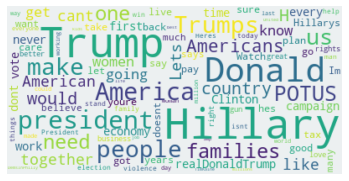

In [25]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="#ECF0F1").generate_from_frequencies(s)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('Hillary.png')
plt.show()